# Intro to Python (HIA 225) Group Project

## Load and clean the data

In [78]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"gproj_dummydata.csv")

**View the number of rows and columns in the data**

In [79]:
df.shape

(5000, 8)

**View the first 20 rows of the data**

In [80]:
df.head(20)

,ptid,dob,prim_dx,discharge_date,discharge_location,age_discharge,readmis_dx,readmis_date
0,1,1937-07-31,pneumonia,2019-12-31,snf,82,chestpain,2020-01-16
1,2,1962-03-07,pneumonia,2019-08-11,rf,57,chestpain,2019-09-02
2,3,1996-09-29,PTSD,2019-07-29,home,23,sharm,2019-09-06
3,4,1987-12-26,sepsis,2019-08-21,home,32,sepsis,2019-09-03
4,5,1935-02-05,pneumonia,2019-08-01,home,85,dehydration,2019-09-07
5,6,1970-07-25,pneumonia,2019-01-20,rf,49,overdose,2019-03-07
6,7,1970-11-30,pneumonia,2019-11-15,home,49,fall,2019-12-13
7,8,1965-11-30,trauma,2019-01-18,home,53,dehydration,2019-02-12
8,9,1987-08-16,pneumonia,2019-09-12,rehab,32,dehydration,2019-09-28
9,10,1989-11-29,PTSD,2019-02-17,home,29,hallucinations,2019-03-15


**Convert discharge and readmission dates from string type to date type**

In [81]:
df["discharge_date"] = pd.to_datetime(df["discharge_date"])
df["readmis_date"] = pd.to_datetime(df["readmis_date"])

**Create a new column, "lapse", that shows the difference in days between the discharge date and the readmission date**

In [82]:
df["lapse"] = (df["readmis_date"]-df["discharge_date"]).dt.days
df.head(10)

,ptid,dob,prim_dx,discharge_date,discharge_location,age_discharge,readmis_dx,readmis_date,lapse
0,1,1937-07-31,pneumonia,2019-12-31,snf,82,chestpain,2020-01-16,16
1,2,1962-03-07,pneumonia,2019-08-11,rf,57,chestpain,2019-09-02,22
2,3,1996-09-29,PTSD,2019-07-29,home,23,sharm,2019-09-06,39
3,4,1987-12-26,sepsis,2019-08-21,home,32,sepsis,2019-09-03,13
4,5,1935-02-05,pneumonia,2019-08-01,home,85,dehydration,2019-09-07,37
5,6,1970-07-25,pneumonia,2019-01-20,rf,49,overdose,2019-03-07,46
6,7,1970-11-30,pneumonia,2019-11-15,home,49,fall,2019-12-13,28
7,8,1965-11-30,trauma,2019-01-18,home,53,dehydration,2019-02-12,25
8,9,1987-08-16,pneumonia,2019-09-12,rehab,32,dehydration,2019-09-28,16
9,10,1989-11-29,PTSD,2019-02-17,home,29,hallucinations,2019-03-15,26


**What is the most common initial diagnosis among patients in this database?**

In [83]:
ct = pd.crosstab(index=df["prim_dx"], columns="count", rownames=["Initial Dx"], colnames=[""])
ct.sort_values(by=['count'], ascending=False)

,count
Initial Dx,
pneumonia,1941
trauma,1505
cesarean,597
PTSD,482
sepsis,475


## Extract only patients initially seen for pneumonia

In [84]:
pndf = df[df["prim_dx"]=="pneumonia"]
pndf.shape

(1941, 9)

**Why are patients being readmitted?**

In [85]:
pnct = pd.crosstab(index=pndf["readmis_dx"], columns="count", rownames=["Readmission Dx"], colnames=[""])
pnct.sort_values(by=['count'], ascending=False)

,count
Readmission Dx,
sepsis,624
dehydration,383
chestpain,347
fall,236
ams,118
dvt,99
overdose,78
other,56


**Within how many days are patients being readmitted?**

In [86]:
pndf.lapse.describe()

count    1941.000000
mean       23.238537
std        15.266103
min         0.000000
25%        11.000000
50%        21.000000
75%        33.000000
max        76.000000
Name: lapse, dtype: float64

**Create a histogram of the time lapse between the discharge date and readmission date**

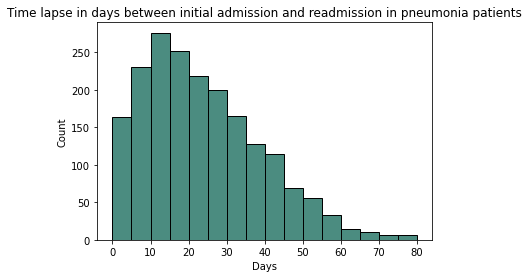

In [87]:
hstplt = sns.histplot(pndf.lapse, binwidth=5, color="#0E6655")
plt.xlabel("Days")
plt.ylabel("Count")
plt.title("Time lapse in days between initial admission and readmission in pneumonia patients")
plt.show(hstplt)

## Extract only patients with pneumonia readmitted within 30 days

In [88]:
pndf30 = pndf[pndf["lapse"]<=30]
pndf30.head(10)

,ptid,dob,prim_dx,discharge_date,discharge_location,age_discharge,readmis_dx,readmis_date,lapse
0,1,1937-07-31,pneumonia,2019-12-31,snf,82,chestpain,2020-01-16,16
1,2,1962-03-07,pneumonia,2019-08-11,rf,57,chestpain,2019-09-02,22
6,7,1970-11-30,pneumonia,2019-11-15,home,49,fall,2019-12-13,28
8,9,1987-08-16,pneumonia,2019-09-12,rehab,32,dehydration,2019-09-28,16
14,15,1973-08-29,pneumonia,2019-08-26,rehab,46,chestpain,2019-09-05,10
15,16,1979-04-10,pneumonia,2019-01-27,home,40,fall,2019-02-16,20
19,20,1957-03-17,pneumonia,2019-08-05,rf,62,sepsis,2019-08-22,17
23,24,1963-11-16,pneumonia,2019-09-20,home,56,dehydration,2019-10-14,24
24,25,1946-08-28,pneumonia,2019-07-18,snf,73,sepsis,2019-08-17,30
27,28,1943-07-16,pneumonia,2019-08-01,snf,76,dehydration,2019-08-22,21


**How many pneumonia patients were readmitted within 30 days?**

In [89]:
len(pndf30.index)

1377

**What is the most common reason pneumonia patients are coming back within 30 days?**

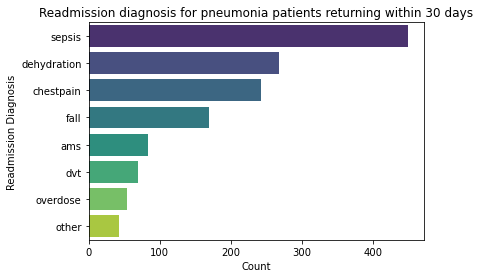

In [90]:
ctplt = sns.countplot(y = "readmis_dx",
                      data = pndf30,
                      palette = "viridis",
                      order = pndf30["readmis_dx"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Readmission Diagnosis")
plt.title("Readmission diagnosis for pneumonia patients returning within 30 days")
plt.show(ctplt)